In [22]:
import sys
sys.argv = sys.argv + ['--config', '/home/zhihua/framework/deepspace/configs/toml/wp8/wp8_data_npy_test.toml']

In [38]:
from imageio import imwrite
from tqdm import tqdm
from pathlib import Path
import numpy as np
from matplotlib.pyplot import imshow
from pathlib import Path
from deepspace.utils.data import read_numpy, normalization
from commontools.data.image import show_images
from commontools.setup import config

In [3]:
file_root = Path('/home/zhihua/data/work_space/wp8/test/cyl9')
size = config.deepspace.size

In [4]:
def get_input_file_path(recon_path):
    input_path = recon_path.parent / (recon_path.name.replace('recon', 'input'))
    return input_path

def show_two_images(args):
    recon_file, input_file = args
    recon_data = np.load(recon_file)
    input_data = np.load(input_file)
    show_images(input_data, shape=(8, 4))
    show_images(recon_data, shape=(8, 4))

def diff_show(input_data, recon_data, index, figsize=None):
    images = [input_data[:, :, index], recon_data[:, :, index], input_data[:, :, index] - recon_data[:, :, index]]
    show_images(images, shape=(3, 1), figsize=figsize)
    

In [5]:
input_bin_data = read_numpy(config.deepspace.bin_file_path, shape=tuple(config.deepspace.bin_shape), datatype=getattr(np, config.deepspace.data_type))
input_bin_data = normalization(input_bin_data)

In [6]:
recon_files = list(file_root.glob('**/recon*.npy'))
# input_files = file_root.glob('**/input*.npy')
input_files = list(map(get_input_file_path, recon_files))

In [7]:
recon_input_files = list(zip(recon_files, input_files))

In [8]:
len(recon_input_files)

22848

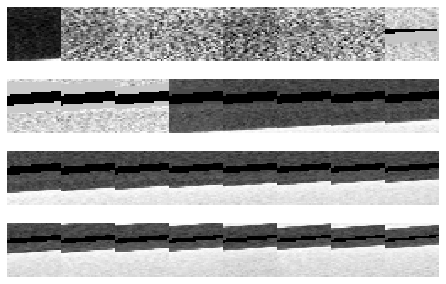

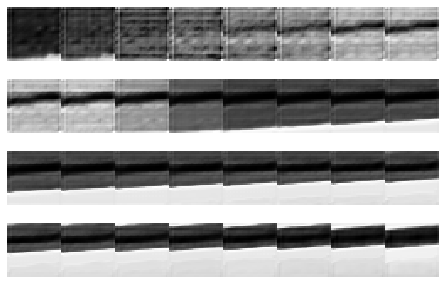

In [9]:
show_two_images(recon_input_files[4000])

reconstruct whole dataset
---

In [10]:
recon_dataset = np.zeros(config.deepspace.bin_shape)

In [11]:
recon_dataset.shape

(781, 781, 793)

In [12]:
def fill_dataset(recon_file):
    recon_data = np.load(recon_file)
    file_name = recon_file.name
    labels = file_name.split('.')[0].split('_')
    x = int(labels[1])
    y = int(labels[2])
    z = int(labels[3])
    recon_dataset[x:x+size, y:y+size, z:z+size] = recon_data

In [13]:
temp = list(map(fill_dataset, recon_files))

In [26]:
diff_dataset = input_bin_data - recon_dataset

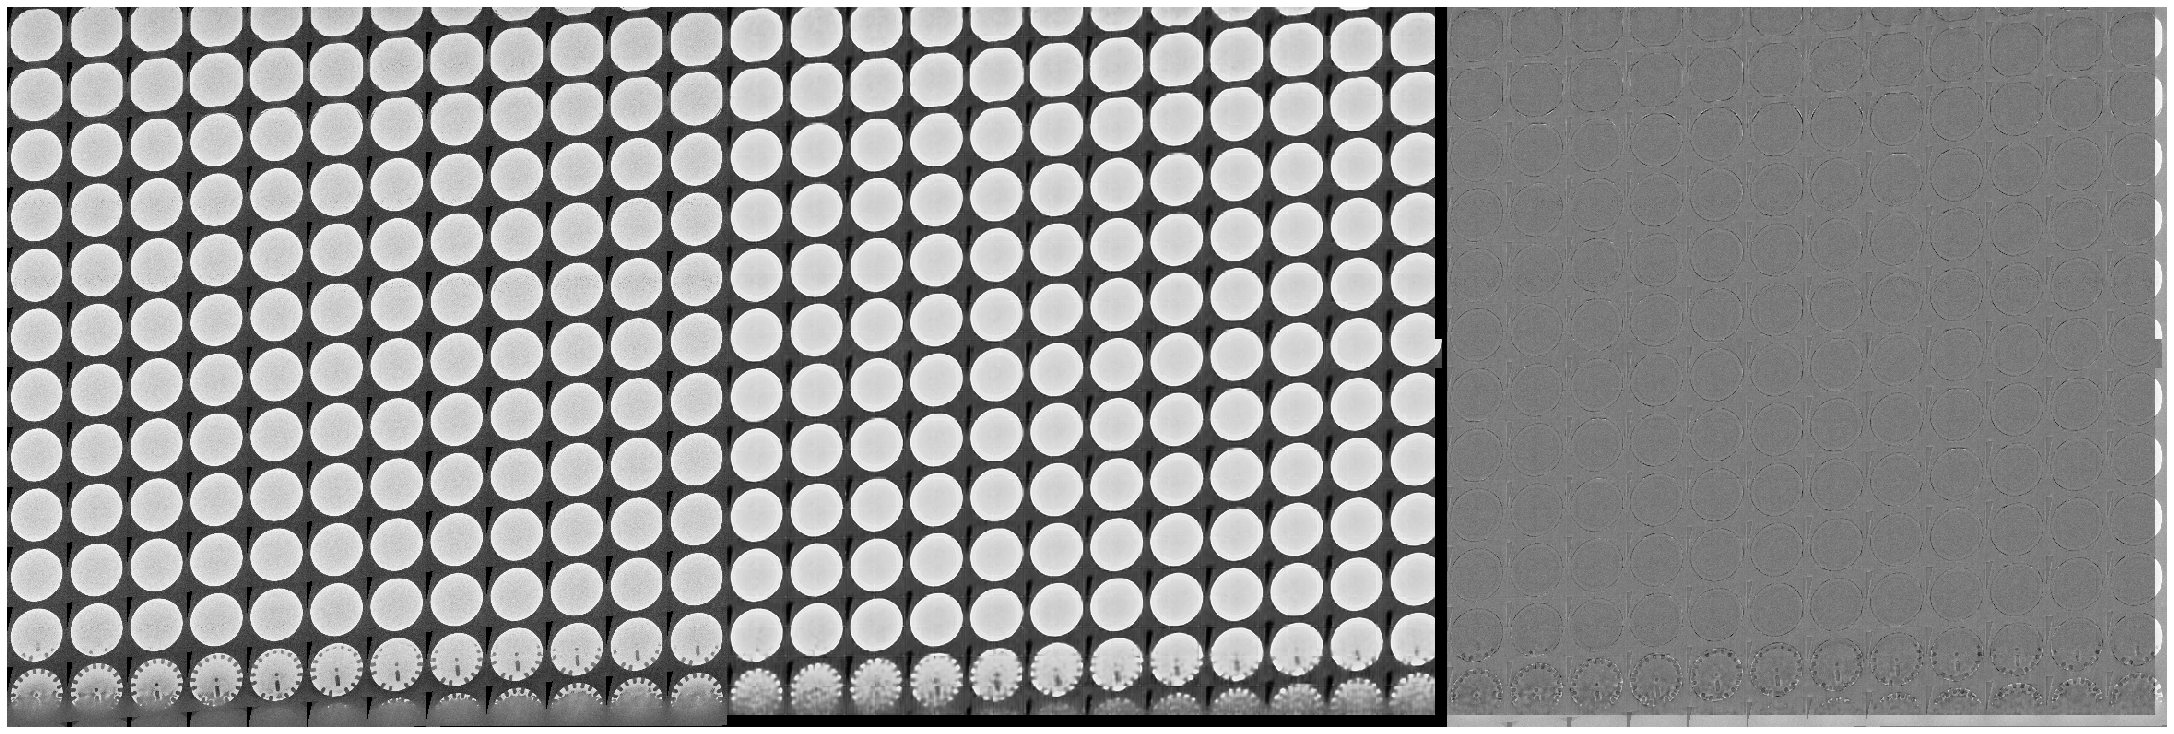

In [20]:
diff_show(input_bin_data, recon_dataset, 10, (30, 20))

In [21]:
print('------input---------')
print(input_bin_data.min(), input_bin_data.max(), input_bin_data.mean(), input_bin_data.std() )
print('----recon-----------')
print(recon_dataset.min(), recon_dataset.max(), recon_dataset.mean(), recon_dataset.std() )

------input---------
0.0 1.0 0.4956137904788027 0.2546062404067355
----recon-----------
0.0 0.9449141621589661 0.4694722748812935 0.27602419666655703


In [25]:
# np.save(config.deepspace.recon_file, recon_dataset)
np.save('/mnt/data/anomaly/wp8/recon/cyl9_recon_ae3dn.npy', recon_dataset)

In [27]:
np.save('/mnt/data/anomaly/wp8/recon/cyl9_diff_ae3dn.npy', diff_dataset)

In [37]:
for index, each_slice in tqdm(enumerate(diff_dataset.transpose(2, 0, 1))):
    imwrite(Path('/home/zhihua/data/work_space/wp8/test/diff/cyl9_png/') / (str(index) + '.png'), each_slice)

[WARNING]: Lossy conversion from float64 to uint8. Range [-0.615992521085777, 0.9292179770550468]. Convert image to uint8 prior to saving to suppress this warning.
[WARNING]: Lossy conversion from float64 to uint8. Range [-0.6102601861119776, 0.9132196610883065]. Convert image to uint8 prior to saving to suppress this warning.
[WARNING]: Lossy conversion from float64 to uint8. Range [-0.6312412397529319, 0.9145703960986563]. Convert image to uint8 prior to saving to suppress this warning.
[WARNING]: Lossy conversion from float64 to uint8. Range [-0.625527116726044, 0.9152896186366347]. Convert image to uint8 prior to saving to suppress this warning.
[WARNING]: Lossy conversion from float64 to uint8. Range [-0.5898823166957543, 0.9104480230151212]. Convert image to uint8 prior to saving to suppress this warning.
[WARNING]: Lossy conversion from float64 to uint8. Range [-0.6360655445109517, 0.9333754341648247]. Convert image to uint8 prior to saving to suppress this warning.
[WARNING]: L

In [32]:
enumerate?

Init signature: enumerate(iterable, start=0)
Docstring:     
Return an enumerate object.

  iterable
    an object supporting iteration

The enumerate object yields pairs containing a count (from start, which
defaults to zero) and a value yielded by the iterable argument.

enumerate is useful for obtaining an indexed list:
    (0, seq[0]), (1, seq[1]), (2, seq[2]), ...
Type:           type
Subclasses:     
